# Pytorch MINST excercice following pythonprogramming.net tutorials

https://pythonprogramming.net/building-deep-learning-neural-network-pytorch/?completed=/data-deep-learning-neural-network-pytorch/

In [22]:
# Imports relevant libraries 
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# Downloads MINST dataset 
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


In [5]:
# Divides the dataset between training data and test data
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [13]:
# Defines de network as a class (OOP)
class Net(nn.Module):
    # Method that sets the network shape
    def __init__(self):
        #super() runs __init__ in parent class
        super().__init__()
        # 28*28 is the number of pixels in image, 64 is number of neurons in first layer
        self.fc1 = nn.Linear(28*28, 64) 
        # 64 is the number of neurons in first layer, 32 in second layer
        self.fc2 = nn.Linear(64, 32)
        # 32 is the number of neurons in second layer, 32 in third layer
        self.fc3 = nn.Linear(32, 128)
        # 128 is the number of neurons in third layer, 10 is the number of possible outcomes the network has (0-9)
        self.fc4 = nn.Linear(128, 10)

    #Method that defines the forward pass of the network
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)


In [26]:
# Creates a random "image" of random pixels to pass through network
X_random = torch.randn((28,28))
#  Flattens the 28*28 matrix
#  -1 tells pytorch that any batch of images can be passed, can be replaced for batch size
X_random = X_random.view(-1,28*28)

In [27]:
#Runs the random pixels through the network.  It Works!!
output = net(X_random)
output

tensor([[-31.5155,  -2.6058,  -1.0134,  -2.1185, -14.8103,  -0.8155, -13.4839,
         -16.8941,  -7.4815, -14.5343]], grad_fn=<LogSoftmaxBackward>)

In [18]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [20]:
EPOCHS = 5

for epoch in range(EPOCHS): # 2 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.0227, grad_fn=<NllLossBackward>)
tensor(0.0043, grad_fn=<NllLossBackward>)
tensor(0.0076, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)
tensor(0.0070, grad_fn=<NllLossBackward>)


In [21]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.973


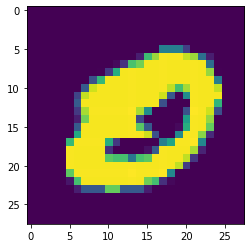

tensor(0)


In [30]:
plt.imshow(X[3].view(28,28))
plt.show()

print(torch.argmax(net(X[3].view(-1,784))[0]))